<a href="https://colab.research.google.com/github/harujem/dataAnalysis/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_EDA%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니프로젝트 - EDA분석

In [2]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')    # 코랩에서 사용
# plt.rc('font', family='Malgun Gothic')     # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False

## 데이터 분석 제목: 유아복 무료 나눔

## 데이터 수집

 - 서울시 유아 연령별 인구 분포를 바탕으로 효율적인 나눔 행사 진행
 - 서울시 구별로 0세부터 7세까지 총합, 남, 여 인구수 데이터
 - https://jumin.mois.go.kr/

In [2]:
import pandas as pd
df = pd.read_csv('202403_202403_연령별인구현황_월간.csv', encoding='cp949')
df.head()

,행정구역,2024년03월_계_총인구수,2024년03월_계_연령구간인구수,2024년03월_계_0세,2024년03월_계_1세,2024년03월_계_2세,2024년03월_계_3세,2024년03월_계_4세,2024년03월_계_5세,2024년03월_계_6세,...,2024년03월_여_총인구수,2024년03월_여_연령구간인구수,2024년03월_여_0세,2024년03월_여_1세,2024년03월_여_2세,2024년03월_여_3세,2024년03월_여_4세,2024년03월_여_5세,2024년03월_여_6세,2024년03월_여_7세
0,서울특별시 (1100000000),"9,384,739","372,033","36,904","40,232","42,550","43,198","46,125","49,533","53,402",...,"4,848,611","180,893","17,896","19,803","20,573","21,125","22,179","23,757","26,184","29,376"
1,서울특별시 서울특별시 종로구 (1111000000),"139,498","4,161",366,434,480,469,551,536,612,...,"72,270","2,034",170,209,222,237,269,266,306,355
2,서울특별시 서울특별시 중구 (1114000000),"121,602","4,330",487,510,566,556,527,518,544,...,"62,835","2,138",229,253,290,271,250,257,273,315
3,서울특별시 서울특별시 용산구 (1117000000),"209,849","8,240",895,"1,011",962,997,"1,054","1,072","1,084",...,"109,361","4,043",450,518,454,488,491,528,540,574
4,서울특별시 서울특별시 성동구 (1120000000),"276,964","12,911","1,388","1,480","1,631","1,571","1,649","1,653","1,696",...,"142,732","6,197",680,697,800,729,786,806,831,868


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                26 non-null     object
 1   2024년03월_계_총인구수     26 non-null     object
 2   2024년03월_계_연령구간인구수  26 non-null     object
 3   2024년03월_계_0세       26 non-null     object
 4   2024년03월_계_1세       26 non-null     object
 5   2024년03월_계_2세       26 non-null     object
 6   2024년03월_계_3세       26 non-null     object
 7   2024년03월_계_4세       26 non-null     object
 8   2024년03월_계_5세       26 non-null     object
 9   2024년03월_계_6세       26 non-null     object
 10  2024년03월_계_7세       26 non-null     object
 11  2024년03월_남_총인구수     26 non-null     object
 12  2024년03월_남_연령구간인구수  26 non-null     object
 13  2024년03월_남_0세       26 non-null     object
 14  2024년03월_남_1세       26 non-null     object
 15  2024년03월_남_2세       26 non-null     object
 16  2024년03월_남_3세       26 non-n

## 데이터 전처리

In [4]:
# 행정구역 연령별 총합 컬럼만 가져옴
# df = df.iloc[:, [0,3,4,5,6,7,8,9,10]]
# df.head()

In [3]:
# 행정구역별 미취학 아동 총합 컬럼만 가져옴
df = df.iloc[:, [0,2]]
df.head()

,행정구역,2024년03월_계_연령구간인구수
0,서울특별시 (1100000000),"372,033"
1,서울특별시 서울특별시 종로구 (1111000000),"4,161"
2,서울특별시 서울특별시 중구 (1114000000),"4,330"
3,서울특별시 서울특별시 용산구 (1117000000),"8,240"
4,서울특별시 서울특별시 성동구 (1120000000),"12,911"


In [4]:
# 컬럼명 변경
df.columns = ['행정구역','0~7세인구수']
df.columns
df.head(2)

,행정구역,0~7세인구수
0,서울특별시 (1100000000),"372,033"
1,서울특별시 서울특별시 종로구 (1111000000),"4,161"


In [5]:
# 0번 행 제거
df = df.drop(0)
df.head(2)

,행정구역,0~7세인구수
1,서울특별시 서울특별시 종로구 (1111000000),"4,161"
2,서울특별시 서울특별시 중구 (1114000000),"4,330"


In [6]:
# 행정구역에서 구 정보 추출
df['행정구역'] = df['행정구역'].str.split(' ').str[2]
df.head()

,행정구역,0~7세인구수
1,종로구,"4,161"
2,중구,"4,330"
3,용산구,"8,240"
4,성동구,"12,911"
5,광진구,"10,848"


In [7]:
# 인구수 문자열을 쉼표 제거후 숫자로 변환
df['0~7세인구수'] = df['0~7세인구수'].str.replace(',', '').astype(int)
df.head()

,행정구역,0~7세인구수
1,종로구,4161
2,중구,4330
3,용산구,8240
4,성동구,12911
5,광진구,10848


In [8]:
# 인구수를 크기순으로 정렬
df = df.sort_values(by='0~7세인구수', ascending=False)
df

,행정구역,0~7세인구수
24,송파구,31443
23,강남구,23780
25,강동구,22804
16,강서구,22598
22,서초구,19527
11,노원구,18609
12,은평구,17446
15,양천구,17425
8,성북구,17181
19,영등포구,16861


## 데이터 시각화

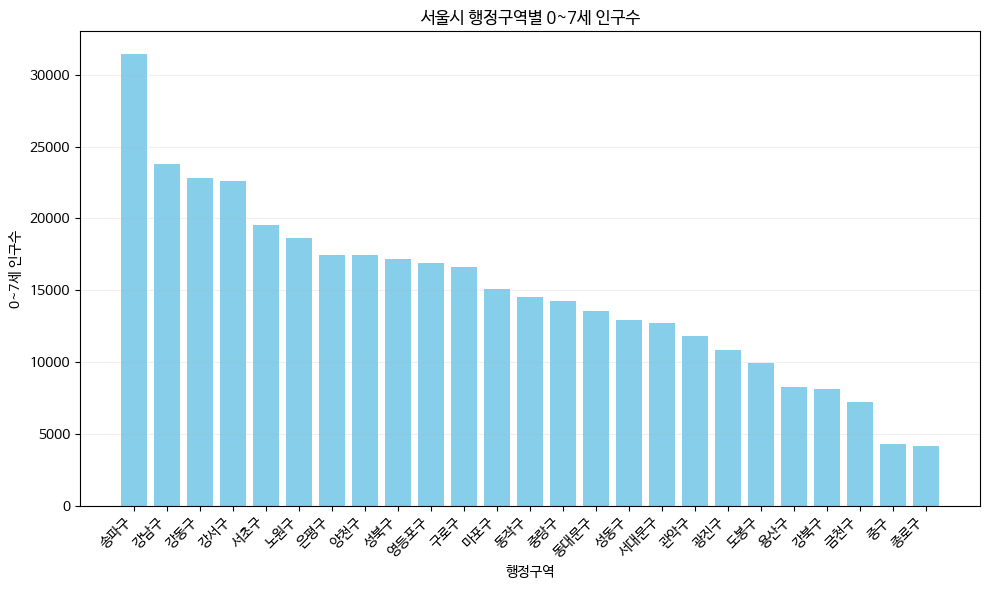

In [9]:
# 그래프 데이터 지정
x =  df['행정구역']
y =  df['0~7세인구수']

# 막대그래프 생성
plt.figure(figsize=(10, 6)) # 그래프 크기
plt.bar(x, y, color='skyblue')

plt.title('서울시 행정구역별 0~7세 인구수') # 제목
plt.xlabel('행정구역') # x축
plt.ylabel('0~7세 인구수') # y축

plt.xticks(rotation=45, ha='right') # x축 눈금라벨 회전 및 정렬
plt.grid(True, axis = 'y', alpha = 0.2) # 그리드
plt.tight_layout()

plt.show()

In [17]:
!pip install folium

In [18]:
!pip install folium --upgrade

In [25]:
!pip show folium

Name: folium
Version: 0.16.0
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: branca, jinja2, numpy, requests, xyzservices
Required-by: datascience, geemap


In [50]:
import folium
import pandas as pd

# 서울시 행정구역별 0~7세 인구수 데이터
data = {
    '행정구역': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
            '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
            '관악구', '서초구', '강남구', '송파구', '강동구'],
    '인구수': [4161, 4330, 8240, 12911, 10848, 13542, 14221, 17181, 8148, 9931,
            18609, 17446, 12714, 15091, 17425, 22598, 16622, 7257, 16861, 14526,
            11817, 19527, 23780, 31443, 22804],
    '위도': [37.5730, 37.5635, 37.5315, 37.5509, 37.5485, 37.5744, 37.5953, 37.5891, 37.6415, 37.6688,
          37.6542, 37.6027, 37.5641, 37.5635, 37.5271, 37.5657, 37.4955, 37.4572, 37.5258, 37.5121,
          37.4744, 37.4954, 37.4954, 37.5145, 37.5280],
    '경도': [126.9794, 126.9895, 126.9793, 127.0403, 127.0820, 127.0400, 127.0930, 127.0182, 127.0147, 127.0473,
          127.0568, 126.9291, 126.9368, 126.9087, 126.8565, 126.8497, 126.8887, 126.8960, 126.9015, 126.9305,
          126.9452, 127.0055, 127.0365, 127.1060, 127.1269]
}

df = pd.DataFrame(data)

# 서울시 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 인구수를 반영하여 원의 크기를 다르게 표현하는 함수
def circle_radius(population):
    max_population = df['인구수'].max()
    return (population / max_population) * 30  # 최대 크기를 30으로 설정

# 각 구청에 대한 원 생성
for index, row in df.iterrows():
    popup_text = f"{row['행정구역']}<br>인구수: {row['인구수']}"
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=circle_radius(row['인구수']),
                        popup=popup_text, fill=True).add_to(seoul_map)

# HTML 파일로 저장
seoul_map.save('seoul_population_map.html')
seoul_map

## 데이터 분석 결과

- 0세부터 7세까지 세분화 하고 싶었지만 어려워 총 합으로만 그래프를 만듬
- 지도상의 행정구역으로 나눠 표현하고 싶었지만 데이터를 찾지 못해 해당 구청 좌표를 찍어 표기함
- 미취학 아동의 인구수가 많은 상위 5개의 구는 [송파구, 강남구, 강동구, 강서구, 서초구]임
- 지역 자체가 넓고 총 인구수가 많은 지역이 아이들도 많은 듯, 지자체에서 아이들을 위한 예산이(1명당) 아이들이 적은 곳은 많이 지원되고 많은 곳은 오히려 적게 지원되는데 데이터만 봐도 예산을 비율에 맞춰 적절히 분배해야할 것 같은데 왜 그렇게 안하는지 모르겠음
- 무료 나눔 행사를 한다면 데이터 분석에 따라 지역을 적절히 나눠 진행